In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [ ]:
d1 = pd.read_csv("Bengaluru_House_Data.csv")
d1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
d1.shape

(13320, 9)

In [ ]:
dk = d1.groupby('area_type')

In [ ]:
dk['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [ ]:
# Removing features that are not prominently affecting the home prices
d2 = d1.drop(['area_type', 'society','balcony','availability'],axis = 'columns')
d2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


d2.isnull()

In [ ]:
d2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
# Dropping rows with null values
d3 = d2.dropna()
d3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
d3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
# CREATING A NEW FEATURE Called bhk
# Seperating the string in size into two strings, one containing the number of bedrooms and the other with the string saying 'bhk' or 'Bedroom'
d3['bhk'] = d3['size'].apply(lambda x : x.split(' '))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
d3['bhk']

0            [2, BHK]
1        [4, Bedroom]
2            [3, BHK]
3            [3, BHK]
4            [2, BHK]
             ...     
13315    [5, Bedroom]
13316        [4, BHK]
13317        [2, BHK]
13318        [4, BHK]
13319        [1, BHK]
Name: bhk, Length: 13246, dtype: object

In [ ]:
d3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,"[2, BHK]"
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,"[4, Bedroom]"
2,Uttarahalli,3 BHK,1440,2.0,62.00,"[3, BHK]"
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,"[3, BHK]"
4,Kothanur,2 BHK,1200,2.0,51.00,"[2, BHK]"


In [ ]:
# Processing the bhk column by converting the data into integers so we can use it to train our model.
d3['bhk'] = d3['bhk'].apply(lambda x: int (x[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
d3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
d3[d3['bhk']>=20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
d3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
# Function to filter the rows out of our dataset that don't have the area in numerical form
def fl(x) :
  try : 
    float(x)
  except :
    return False
  return True
  

In [ ]:
d3[~d3.total_sqft.apply(lambda x : fl(x))]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [ ]:
# Function to convert values given in ranges, in the total_sqft column to average values 
# to simplify our analysis.

def sqft_to_num(x) :
  tokens = x.split('-')
  if len(tokens) == 2 :
    return (float(tokens[0]) + float(tokens[1]))/2
  try :
    return float(x)
  except :
    return None


In [ ]:
d4 = d3.copy()

In [ ]:
d4['total_sqft'] = d4['total_sqft'].apply(lambda x : sqft_to_num(x))

In [ ]:
d4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
d5 = d4.copy()

In [ ]:
# FEATURE ENGINEERING
# We create a new feature called 'price_per_sqft' 
# as it is an essential parameter in analysing the variation of prices.
d5['price_per_sqft'] = d5['price']*100000/d5['total_sqft']

In [ ]:
d5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
d5['location'] = d5['location'].apply(lambda x : x.strip())
locstats = d5.groupby('location')['location'].agg('count')
locstats = locstats.sort_values(ascending = False)
locstats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [ ]:
len(d4)

13246

In [ ]:
len(d5.location.unique())

1293

In [ ]:
locstats_less10 = locstats[locstats<=10]

In [ ]:
#d5.location = d5.location.apply(lambda x : 'other' if x in locstats else x)

len(locstats_less10)

1052

In [ ]:
len(d5.location.unique())

1293

In [ ]:
d5.location = d5.location.apply(lambda x : 'other' if x in locstats_less10 else x)

In [ ]:
len(d5.location.unique())

242

In [ ]:
## OUTLIER REMOVAL - Extreme variations in the data

In [ ]:
d6 = d5.copy()

In [ ]:
d6 = d6[~(d6.total_sqft / d6.bhk < 300)]

In [ ]:
d6.shape

(12502, 7)

In [ ]:
d6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(d6)
df7.shape

(10241, 7)

In [ ]:
def remove_outliers(df) :
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location') :
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf['price_per_sqft']<=(m+st)) & (subdf['price_per_sqft']>(m-st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index = True)
  return df_out



In [ ]:
d7 = remove_outliers(d6)


In [ ]:

d7.shape

(10241, 7)

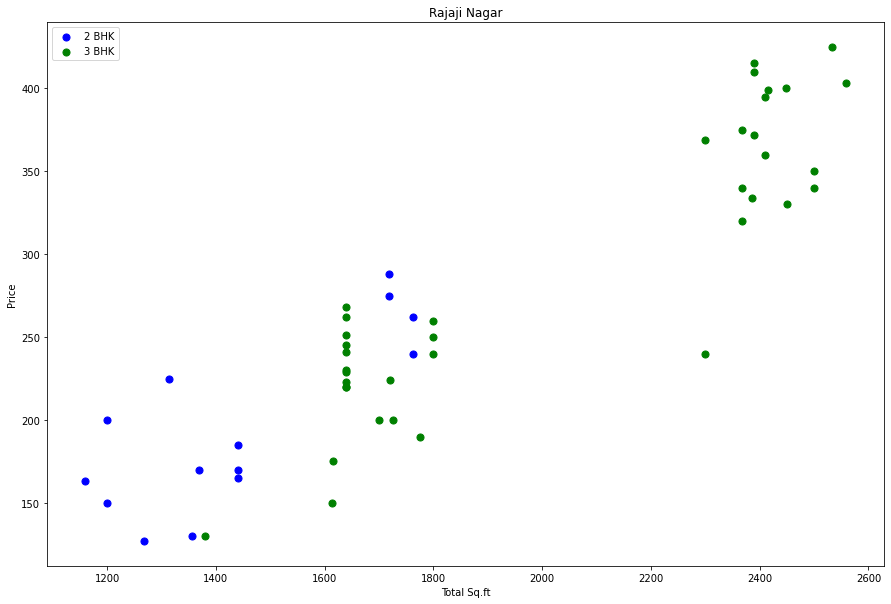

In [ ]:
def plot(df,location) :
  bhk2 = df[(df.location == location) & (df.bhk == 2)]
  bhk3 = df[(df.location == location) & (df.bhk == 3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue',label = '2 BHK', s = 50)
  plt.scatter(bhk3.total_sqft,bhk3.price,color = 'green',label = '3 BHK', s = 50)
  plt.xlabel('Total Sq.ft')
  plt.ylabel('Price')
  plt.title(location)
  plt.legend()

plot(d7,"Rajaji Nagar")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [ ]:
d8 = remove_bhk_outliers(d7)

In [ ]:
d8.shape


(7329, 7)

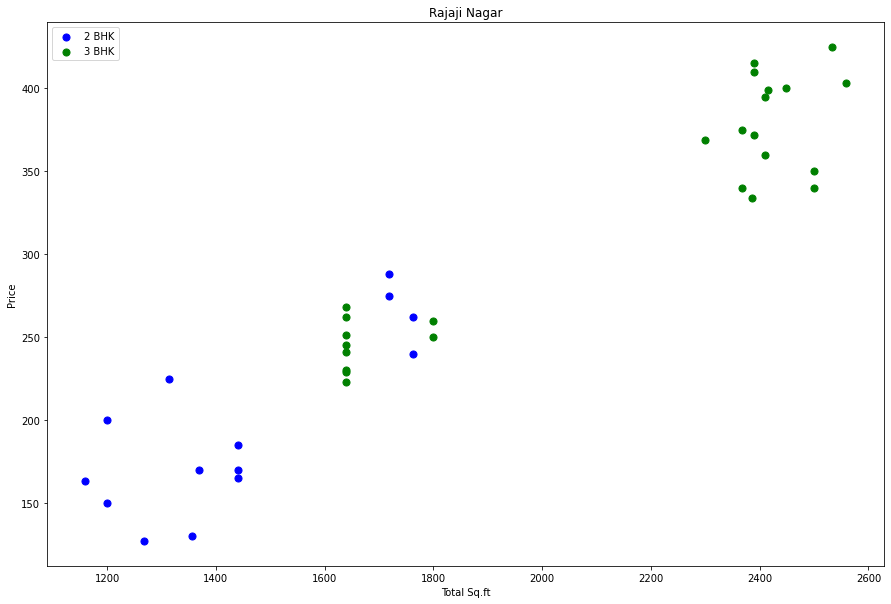

In [ ]:
plot(d8,'Rajaji Nagar')

Text(0, 0.5, 'Count')

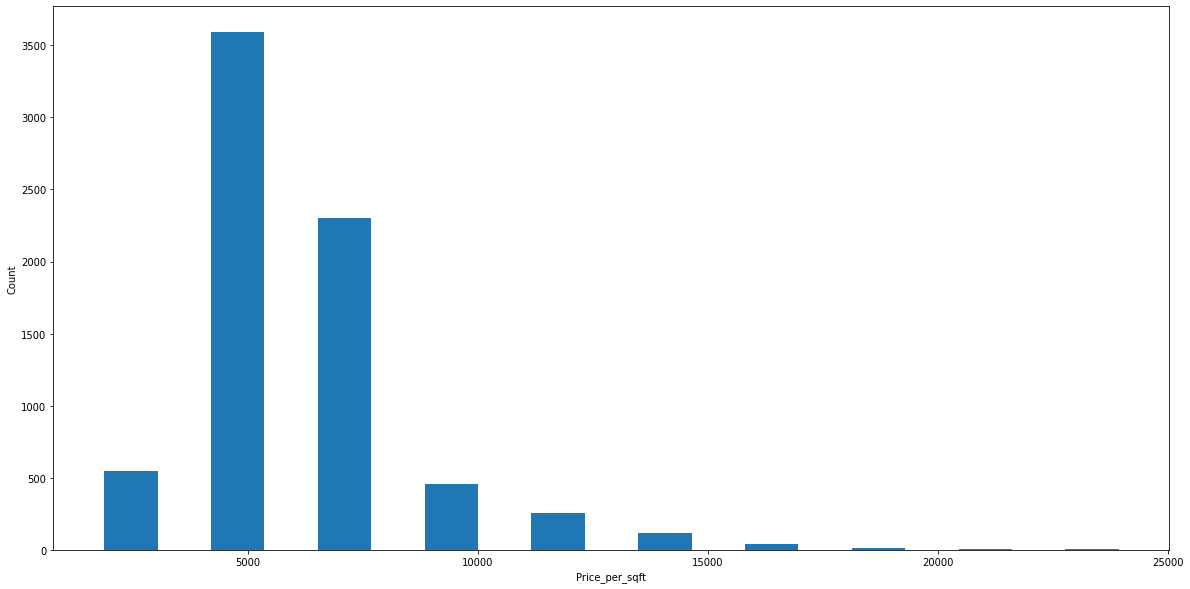

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(d8.price_per_sqft,rwidth = 0.5)
plt.xlabel('Price_per_sqft')
plt.ylabel('Count')

In [ ]:
d8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
d8[d8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

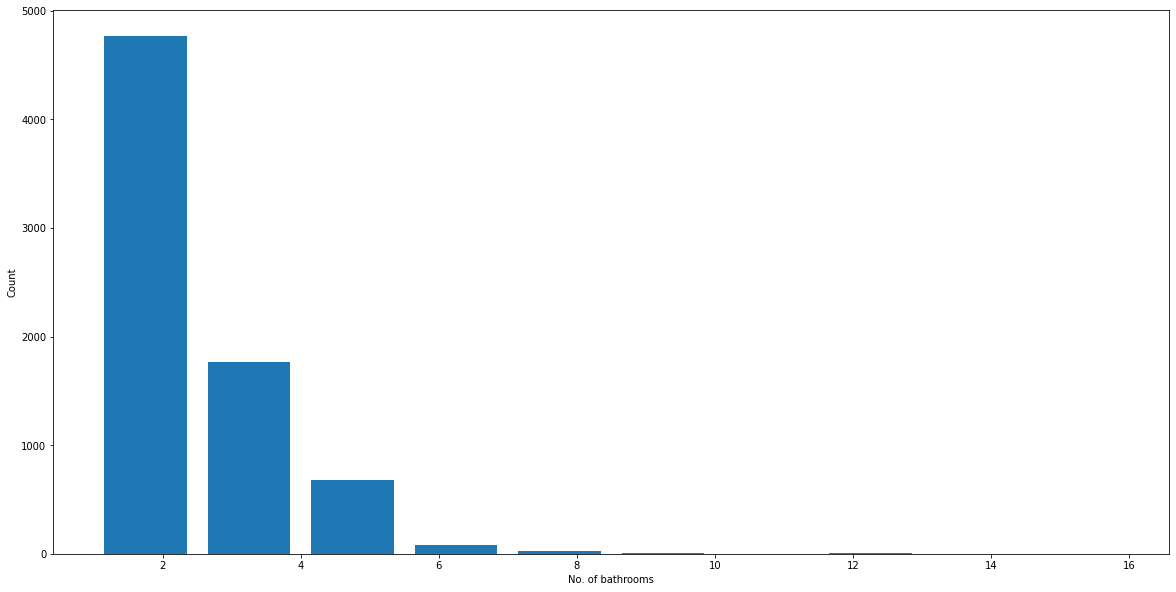

In [ ]:
plt.hist(d8.bath, rwidth = 0.8)
plt.xlabel('No. of bathrooms')
plt.ylabel('Count')

In [ ]:
d8[d8.bath > d8.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
d9 = d8[d8.bath < d8.bhk + 2] 
d9.shape

(7251, 7)

In [ ]:
d10 = d9.drop(['size','price_per_sqft'],axis = 'columns')
d10.shape

(7251, 5)

In [ ]:
dummies = pd.get_dummies(d10.location)

In [ ]:
d11 = pd.concat([d10,dummies.drop('other',axis = 'columns')],axis = 'columns')

In [ ]:
d11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
d12 = d11.drop('location',axis = 'columns')

In [ ]:
X = d12.drop('price',axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = d12.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.8541850010771193

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 2)

cross_val_score(LinearRegression(), X, Y, cv=cv)


array([0.86737231, 0.85817913, 0.86058531, 0.79396905, 0.87042283])

In [ ]:
from sklearn.model_selection import GridSearchCV
# We use GridSearchCV to select the best model for our data = Hyper-Parameter Tuning
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model_gridsearch_cv (X,Y) :
  models = {
      'linear regression' : {
          'model' : LinearRegression(),
          'params' : {
              'normalize' : [True,False]
          }
      },
      'lasso' : {
          'model' : Lasso(),
          'params' : {
              'alpha' : [1,2],
              'selection' : ['random','cyclic']
              
          }
      },
      'decision tree' : {
          'model' : DecisionTreeRegressor(),
          'params' : {
              'criterion' : ['mse','friedman_mse'],
              'splitter' : ['best','random']
          }
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=10)
  for algo_name,config in models.items() :
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
    gs.fit(X,Y)
    scores.append({
        'model' : algo_name,
        'best score' : gs.best_score_,
        'best params' : gs.best_params_
    })
  return pd.DataFrame(scores,columns = ['model','best score','best params'])
best_model_gridsearch_cv(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,model,best score,best params
0,linear regression,0.847375,{'normalize': False}
1,lasso,0.713010,"{'alpha': 1, 'selection': 'random'}"
2,decision tree,0.682317,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [ ]:
def predict_price(location,sqft,bath,bhk) :
  locID = np.where(X.columns == location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if locID >= 0 :
    x[locID] = 1
  #return locID
  return model.predict([x])[0]



In [ ]:
predict_price('1st Phase JP Nagar',1000,2,2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


83.49904677207954

In [ ]:
predict_price('1st Phase JP Nagar',1000,3,3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


86.80519395234735

In [ ]:
predict_price('Rajaji Nagar',1000,2,3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


217.36791546639486

In [ ]:
import pickle
with open('Bangalore_home_prices_model.pickle','wb') as f:
  pickle.dump(model,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))